In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [7]:
# Load the dataset
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")

# Display the first few rows of the dataset
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [8]:
# Check for missing values
df.isnull().sum()


,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [9]:
# Summary statistics of the dataset
df.describe()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Column names and data types in the DataFrame:
Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object
KeyError: "['Age'] not in index". Check if all columns exist in the DataFrame.
ValueError: could not convert string to float: 'Diesel'. There might be an issue with the data, like non-numeric columns.
ValueError: Could not interpret value `FuelType` for `x`. An entry with this name does not appear in `data`.. Ensure 'FuelType' and 'Price' columns exist and have appropriate data.


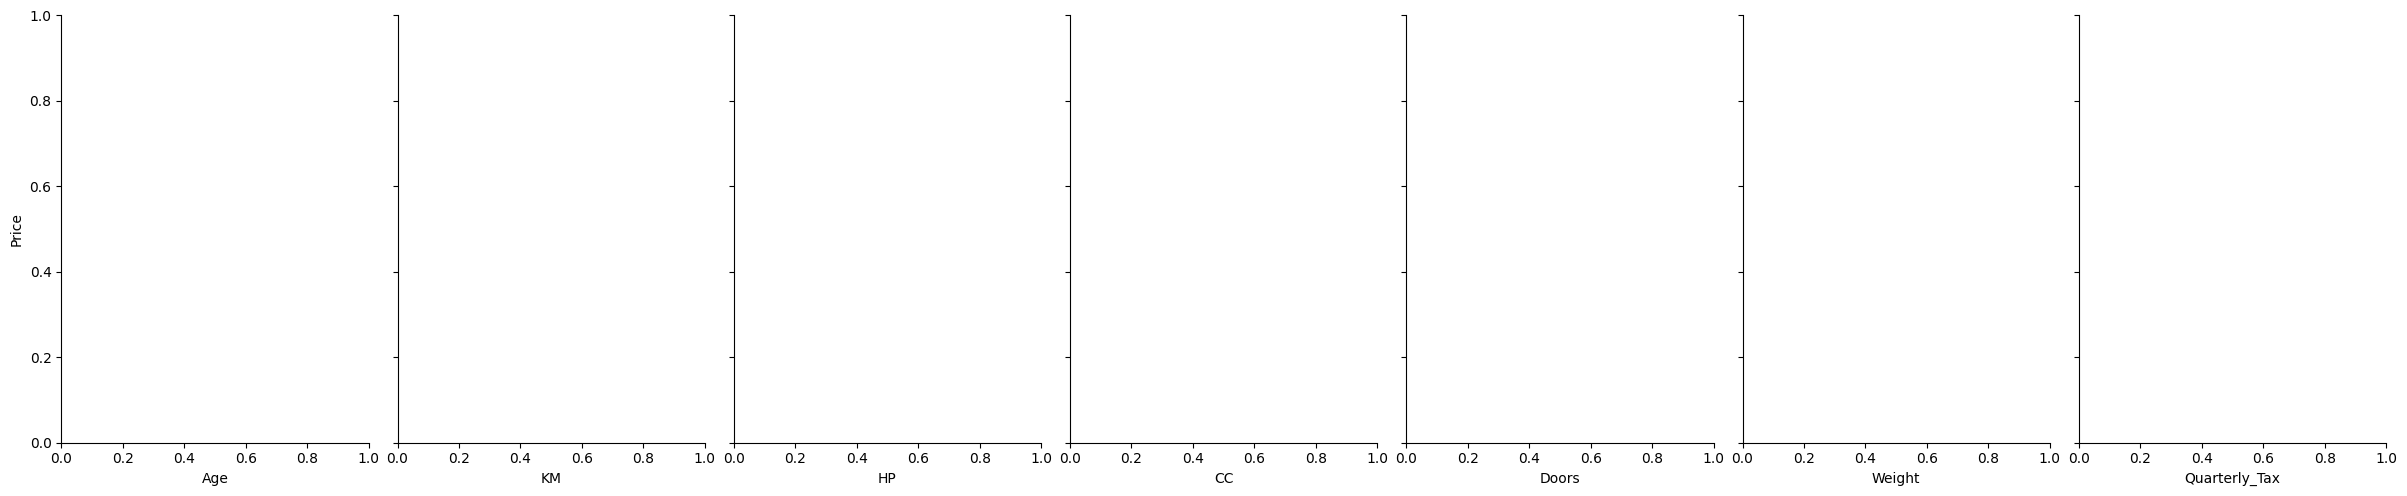

<Figure size 1000x800 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Verify Column Names and Data Types
print("Column names and data types in the DataFrame:")
print(df.dtypes)

# Step 2: Handle missing values (if any)
df = df.dropna()  # You can also use df.fillna() to fill missing values

# Step 3: Pairplot to visualize relationships between variables
try:
    sns.pairplot(df, x_vars=['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Quarterly_Tax'], y_vars='Price', height=5, aspect=0.7)
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}. Check if all columns exist in the DataFrame.")

# Step 4: Correlation heatmap
try:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
except ValueError as e:
    print(f"ValueError: {e}. There might be an issue with the data, like non-numeric columns.")

# Step 5: Boxplot to visualize the distribution of Price by FuelType
try:
    sns.boxplot(x='FuelType', y='Price', data=df)
    plt.title("Boxplot of Price by FuelType")
    plt.show()
except ValueError as e:
    print(f"ValueError: {e}. Ensure 'FuelType' and 'Price' columns exist and have appropriate data.")


In [15]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)


In [16]:
# Split the data into predictors (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']


In [17]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Model 1: Simple Multiple Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)


LinearRegression()

In [20]:
# Model 2: Lasso Regression
model_2 = Lasso(alpha=0.1)
model_2.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [21]:
# Model 3: Ridge Regression
model_3 = Ridge(alpha=0.1)
model_3.fit(X_train_scaled, y_train)


Ridge(alpha=0.1)

In [22]:
# Model evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")


In [23]:
# Evaluate Model 1
print("Evaluation for Model 1 (Multiple Linear Regression):")
evaluate_model(model_1, X_test_scaled, y_test)


Evaluation for Model 1 (Multiple Linear Regression):
Mean Squared Error: 2203043.82
R-squared: 0.83


In [24]:
# Evaluate Model 2
print("\nEvaluation for Model 2 (Lasso Regression):")
evaluate_model(model_2, X_test_scaled, y_test)



Evaluation for Model 2 (Lasso Regression):
Mean Squared Error: 2202739.48
R-squared: 0.83


In [25]:
# Evaluate Model 3
print("\nEvaluation for Model 3 (Ridge Regression):")
evaluate_model(model_3, X_test_scaled, y_test)



Evaluation for Model 3 (Ridge Regression):
Mean Squared Error: 2202832.14
R-squared: 0.83


In [26]:
# Cross-validation for Lasso and Ridge
from sklearn.model_selection import cross_val_score

lasso_cv = cross_val_score(Lasso(alpha=0.1), X_train_scaled, y_train, cv=5)
ridge_cv = cross_val_score(Ridge(alpha=0.1), X_train_scaled, y_train, cv=5)

print(f"\nCross-Validation Scores for Lasso: {lasso_cv}")
print(f"Cross-Validation Scores for Ridge: {ridge_cv}")



Cross-Validation Scores for Lasso: [0.87067633 0.14663471 0.87450259 0.86967964 0.78454357]
Cross-Validation Scores for Ridge: [0.87066816 0.14973307 0.87449909 0.86967256 0.78451896]


In [27]:
# Summary of coefficients
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Linear Coef': model_1.coef_,
    'Lasso Coef': model_2.coef_,
    'Ridge Coef': model_3.coef_,
})
print("\nCoefficients Summary:\n", coef_df)



Coefficients Summary:
             Variable   Linear Coef   Lasso Coef   Ridge Coef
0          Age_08_04 -2.267295e+03 -2267.270353 -2267.065040
1                 KM -6.116544e+02  -611.710485  -611.825796
2                 HP  2.083499e+02   208.460180   208.466396
3          Automatic  3.439713e+01    34.335631    34.413778
4                 cc -1.416192e+01   -14.044285   -14.147406
5              Doors -5.746780e+01   -57.288237   -57.384642
6          Cylinders  7.815970e-14     0.000000     0.000000
7              Gears  1.093404e+02   109.268038   109.350623
8             Weight  1.316818e+03  1316.405210  1316.583158
9   Fuel_Type_Diesel -2.172217e+01   -21.484319   -21.815540
10  Fuel_Type_Petrol  4.580477e+02   457.891241   457.632041


In [28]:
# Adding a constant to the model for interpretation with statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print("\nModel Summary:\n", sm_model.summary())



Model Summary:
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:22:56   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.075e+04     38.652   